# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell.
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions.

# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (35 points)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more]([Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/))

##  What you need to do
For this task, you are required to build a fully connect feed-forward ANN model
for a classification problem.

For the given data, you need do proper data preprocessing, data analysis,
design the ANN model, then fine-tune your model architecture.

For evaluating your model, do $ 80/20 $ train test split.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Identify the appropriate classification approach for a given problem. 20%
- Apply ANNs to solve a classification problem (basic training, validation, testing -- without fine tuning). 50%
- Fine-tune to determine the optimal model architecture. 20%


### Data
You will be working with the data in `Task_1.csv` for identifying waldo (the user with `user_id=0`) 

The columns include:
 - browser
 - os
 - locale
 - user_id
 - location
 - sites
 - time
 - date

After training, evaluate you model by print [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
on your test set. 

Then predicting each user in `task_1_verify.csv` whether it's Waldo or not. Your output should look like the following:

`row_idx: is_waldo`, notice if the user is waldo your output should be 1

``` 
0: 1
1: 0
2: 0
3: 1
4: 1
...
```



In [2]:
SEED = 42

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('task 1.csv')
train_df.head()

,index,browser,os,locale,user_id,location,sites,time,date
0,8909,Firefox,Windows 10,zh-CN,46,China/Shanghai,"[{'site': '1.static.dpreview.com', 'length': 1...",14:14:00,2016-01-28
1,17679,Internet Explorer,Windows 8,ro-RO,21,Germany/Berlin,"[{'site': 'safebrowsing-cache.google.com', 'le...",05:23:00,2016-08-26
2,11803,Internet Explorer,MacOS,ur-PK,98,Australia/Sydney,"[{'site': 'www.ncbi.nlm.nih.gov', 'length': 10...",12:03:00,2016-03-13
3,356,Internet Explorer,Ubuntu,pl-PL,44,Japan/Tokyo,"[{'site': 'fr.hdscreen.me', 'length': 16}, {'s...",06:08:00,2017-01-19
4,10948,Internet Explorer,Windows 8,bg-BG,59,Japan/Tokyo,"[{'site': '193.164.196.50', 'length': 10}, {'s...",03:59:00,2017-05-13


In [4]:
train_df.user_id.value_counts()

0      400
55     131
82     127
148    122
120    121
      ... 
124     84
145     83
170     82
42      82
152     77
Name: user_id, Length: 200, dtype: int64

## Preprocessing
I decided to consider this task as a binary classification problem.

In [5]:
train_df['is_waldo'] = (train_df.user_id == 0).astype(np.int8)
train_df.head()

,index,browser,os,locale,user_id,location,sites,time,date,is_waldo
0,8909,Firefox,Windows 10,zh-CN,46,China/Shanghai,"[{'site': '1.static.dpreview.com', 'length': 1...",14:14:00,2016-01-28,0
1,17679,Internet Explorer,Windows 8,ro-RO,21,Germany/Berlin,"[{'site': 'safebrowsing-cache.google.com', 'le...",05:23:00,2016-08-26,0
2,11803,Internet Explorer,MacOS,ur-PK,98,Australia/Sydney,"[{'site': 'www.ncbi.nlm.nih.gov', 'length': 10...",12:03:00,2016-03-13,0
3,356,Internet Explorer,Ubuntu,pl-PL,44,Japan/Tokyo,"[{'site': 'fr.hdscreen.me', 'length': 16}, {'s...",06:08:00,2017-01-19,0
4,10948,Internet Explorer,Windows 8,bg-BG,59,Japan/Tokyo,"[{'site': '193.164.196.50', 'length': 10}, {'s...",03:59:00,2017-05-13,0


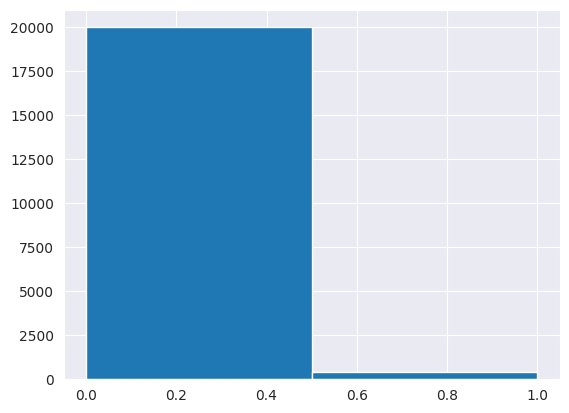

In [6]:
train_df.is_waldo.hist(bins=2)
plt.show()

We can see significant class imbalance on the plot above.

In [7]:
X = train_df.drop(columns=['user_id', 'index', 'sites', 'is_waldo', 'date'])
X.time = pd.to_datetime(X.time).to_numpy().reshape((-1, 1))
X['weekday'] = pd.to_datetime(train_df.date).apply(lambda x: x.weekday()).to_numpy().reshape(
    (-1, 1))
X['total_time'] = train_df.sites.apply(lambda x: sum(s['length'] for s in eval(x)))

In [8]:
y = train_df.is_waldo.astype(np.float32)

In [9]:
X.head()

,browser,os,locale,location,time,weekday,total_time
0,Firefox,Windows 10,zh-CN,China/Shanghai,2023-04-08 14:14:00,3,117
1,Internet Explorer,Windows 8,ro-RO,Germany/Berlin,2023-04-08 05:23:00,4,1559
2,Internet Explorer,MacOS,ur-PK,Australia/Sydney,2023-04-08 12:03:00,6,313
3,Internet Explorer,Ubuntu,pl-PL,Japan/Tokyo,2023-04-08 06:08:00,3,451
4,Internet Explorer,Windows 8,bg-BG,Japan/Tokyo,2023-04-08 03:59:00,5,164


In [10]:
tmp = pd.concat([X, y], axis=1)
tmp.head()

,browser,os,locale,location,time,weekday,total_time,is_waldo
0,Firefox,Windows 10,zh-CN,China/Shanghai,2023-04-08 14:14:00,3,117,0.0
1,Internet Explorer,Windows 8,ro-RO,Germany/Berlin,2023-04-08 05:23:00,4,1559,0.0
2,Internet Explorer,MacOS,ur-PK,Australia/Sydney,2023-04-08 12:03:00,6,313,0.0
3,Internet Explorer,Ubuntu,pl-PL,Japan/Tokyo,2023-04-08 06:08:00,3,451,0.0
4,Internet Explorer,Windows 8,bg-BG,Japan/Tokyo,2023-04-08 03:59:00,5,164,0.0


## Looking at features

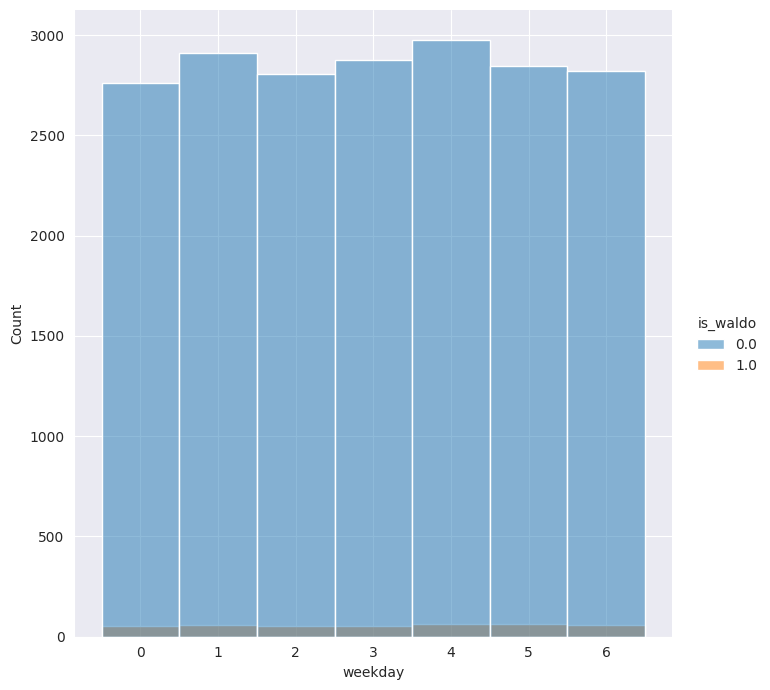

In [11]:
import seaborn as sns

sns.displot(tmp, x="weekday", hue="is_waldo", discrete=True, height=7)
plt.show()

The feature above is not informative: both classes has uniform distribution of weekdays.

In [36]:
X = X.drop(columns=["weekday"])

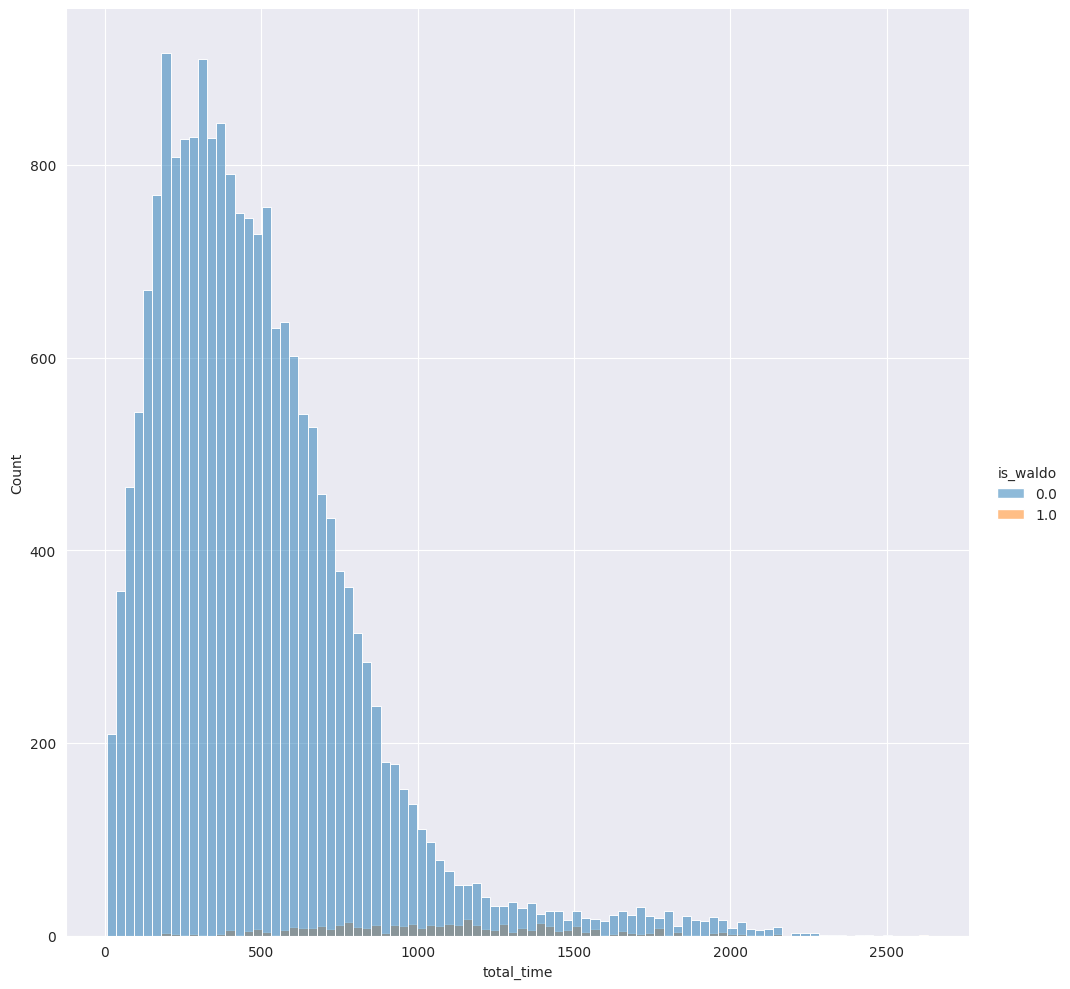

In [13]:
sns.displot(tmp, x="total_time", hue="is_waldo", height=10)
plt.show()

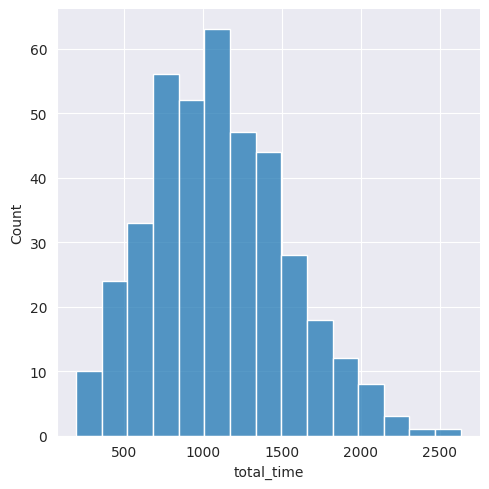

In [14]:
sns.displot(tmp[tmp.is_waldo == 1], x="total_time")
plt.show()

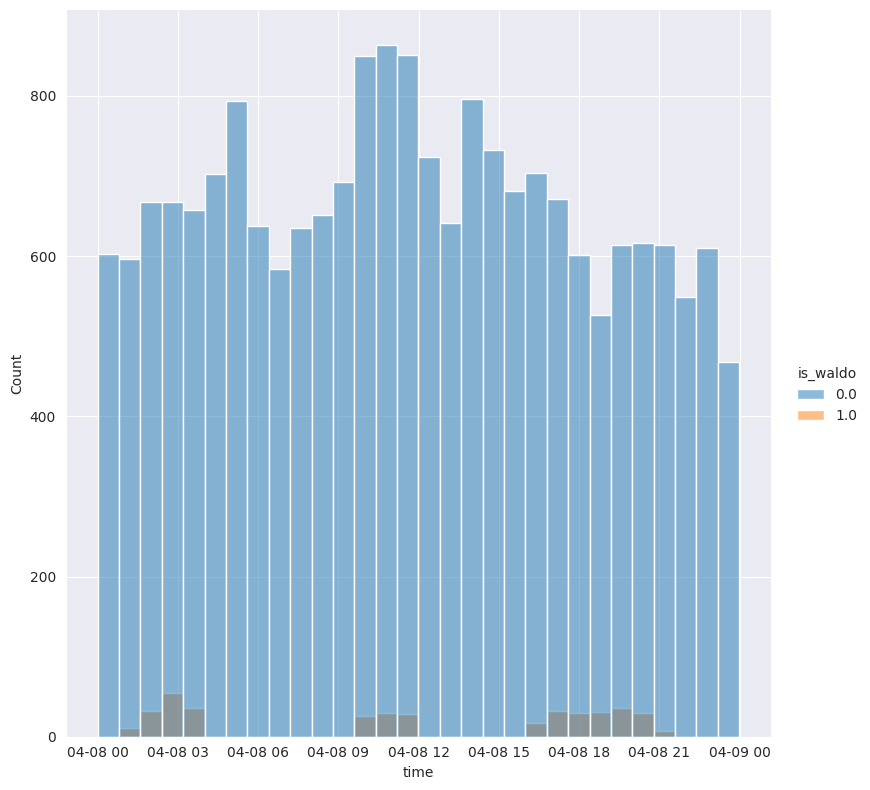

In [15]:
sns.displot(tmp, x="time", hue="is_waldo", height=8)
plt.show()

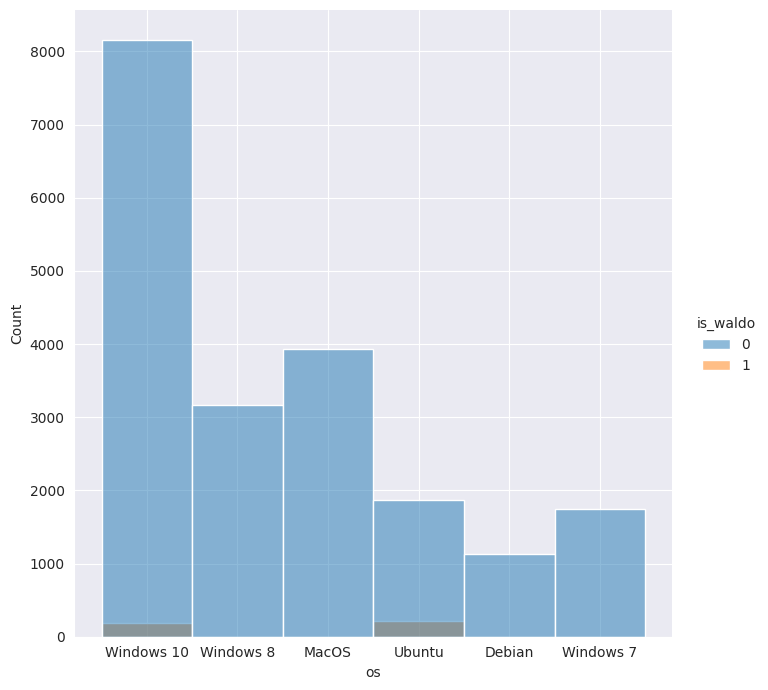

In [16]:
sns.displot(train_df, x="os", hue="is_waldo", height=7)
plt.show()

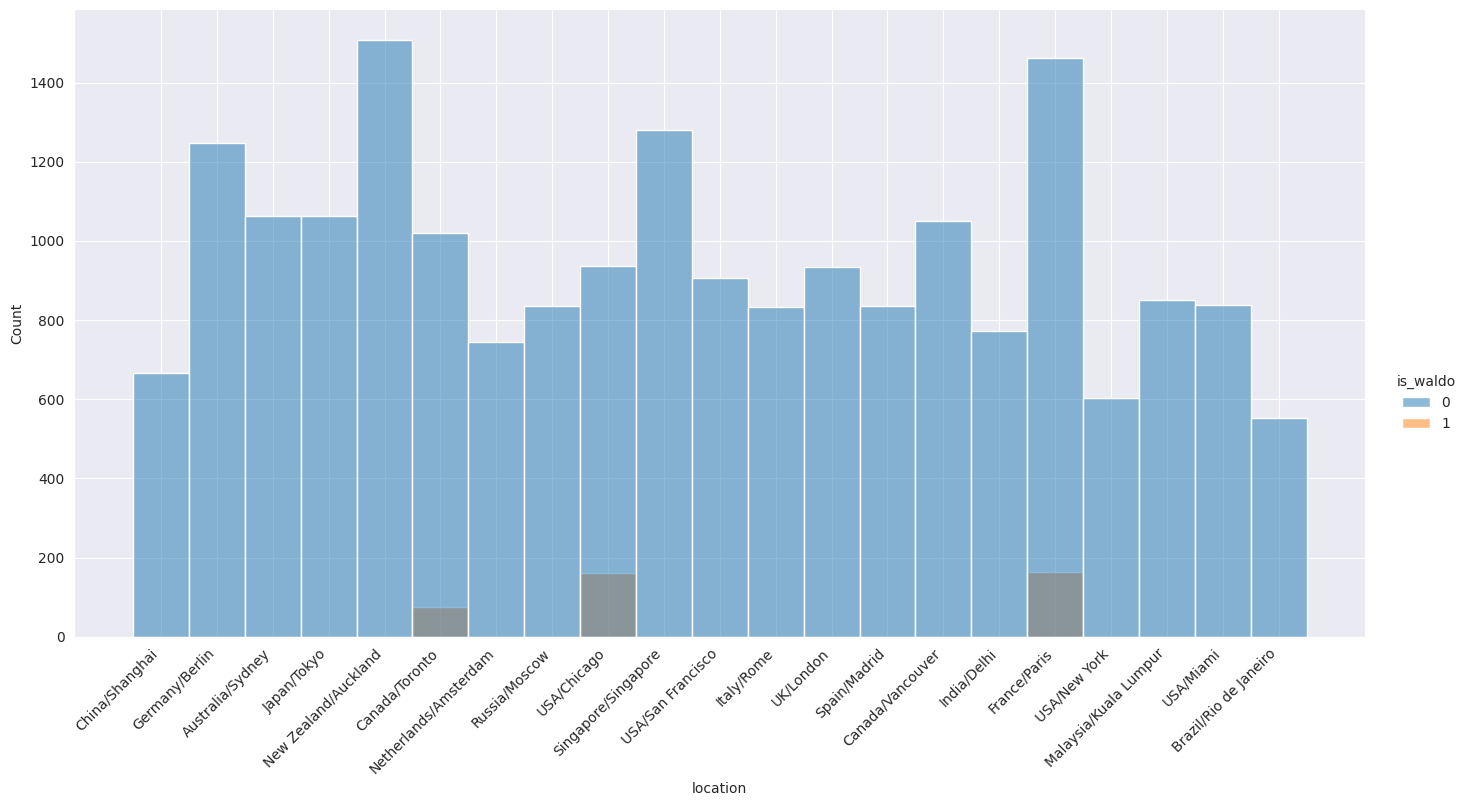

In [17]:
sns.displot(train_df, x="location", hue="is_waldo", height=7, aspect=2, discrete=True)

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

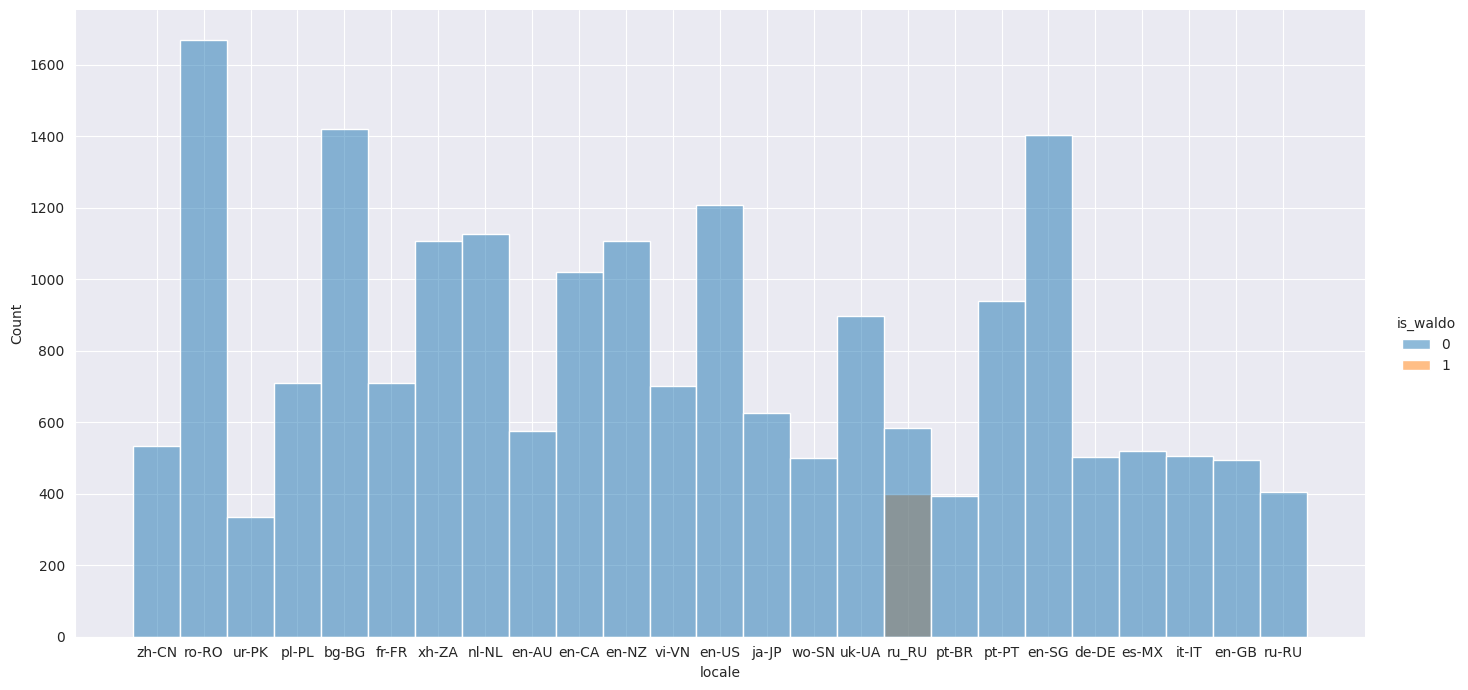

In [18]:
sns.displot(train_df, x="locale", hue="is_waldo", height=7, aspect=2, discrete=True)
plt.show()

## Splitting & balancing

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED,
                                                    stratify=y)

In [38]:
from sklearn.utils import resample

is_waldo_filter = y_train == 1

# separate majority and minority classes
X_train_majority = X_train[~is_waldo_filter]
X_train_minority = X_train[is_waldo_filter]

y_train_majority = y_train[~is_waldo_filter]
y_train_minority = y_train[is_waldo_filter]

# Upsample minority class
X_train_minority_upsampled = resample(
    X_train_minority,
    replace=True,
    n_samples=len(X_train_majority),
    random_state=SEED
)

y_train_minority_upsampled = resample(
    y_train_minority,
    replace=True,
    n_samples=len(y_train_majority),
    random_state=SEED
)

# Combine majority class with upsampled minority class
X_train_balanced = pd.concat([X_train_majority, X_train_minority_upsampled])
y_train_balanced = pd.concat([y_train_majority, y_train_minority_upsampled])

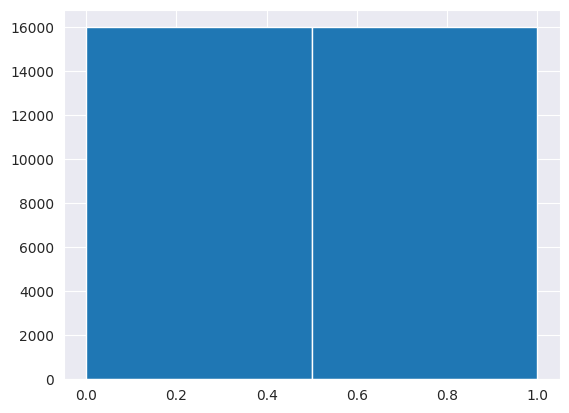

In [39]:
y_train_balanced.hist(bins=2)
plt.show()

## Model training

In [40]:
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from skorch import NeuralNetBinaryClassifier
from sklearn.compose import ColumnTransformer

torch.manual_seed(SEED)

NUM_NEURONS = 64
NUM_HIDDEN_LAYERS = 0

In [41]:
class CustomModel(nn.Module):
    def __init__(self, num_neurons=NUM_NEURONS, num_layers=NUM_HIDDEN_LAYERS, input_dims=58):
        super(CustomModel, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dims, num_neurons))
        for _ in range(num_layers):
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Linear(num_neurons, num_neurons))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(num_neurons, 1))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [43]:
net = NeuralNetBinaryClassifier(
    CustomModel, max_epochs=30, optimizer=torch.optim.Adam, lr=0.01,
    device=device, batch_size=X_train.shape[0]
)

num_cols_filter = X_train.columns.isin(('time', 'total_time'))
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(dtype=np.float32), X_train.columns[~num_cols_filter]),
    ('time_scaler', StandardScaler(), ('time',)),
    ('length_scaler', StandardScaler(), ('total_time',))
])


def to_float32(x):
    return x.astype(np.float32)


fun_tr = FunctionTransformer(to_float32)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('to_float', fun_tr),
    ('net', net)
])

In [44]:
pipeline.fit(X_train_balanced, y_train_balanced)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7151       0.5958        0.6461  2.1033
      2        0.6323       0.9417        0.5849  2.2040
      3        0.5688       0.9878        0.5187  2.0906
      4        0.5010       0.9830        0.4454  2.1752
      5        0.4272       0.9783        0.3681  1.8682
      6        0.3511       0.9764        0.2934  1.8581
      7        0.2792       0.9762        0.2277  1.9508
      8        0.2170       0.9769        0.1745  1.8713
      9        0.1669       0.9778        0.1339  1.9660
     10        0.1284       0.9792        0.1038  1.8898
     11        0.0997       0.9802        0.0819  1.8549
     12        0.0784       0.9834        0.0659  1.9518
     13        0.0627       0.9852        0.0539  1.8796
     14        0.0511       0.9870        0.0449  1.8687
     15        0.0423       0.9888        0.0380  2.0033
     16        0.0356       0.9

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(dtype=<class 'numpy.float32'>),
                                                  Index(['browser', 'os', 'locale', 'location'], dtype='object')),
                                                 ('time_scaler',
                                                  StandardScaler(), ('time',)),
                                                 ('length_scaler',
                                                  StandardScaler(),
                                                  ('total_time',))])),
                ('to_float',
                 FunctionTransformer(func=<function to_float32 at 0x7f2a345feac0>)),
                ('net',
                 <class 'skorch.classifier.NeuralNetBinaryClassifier'>[initialized](
  module_=CustomModel(
    (layers): ModuleList(
      (0): Linear(in_features=58, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=1, bias=True)
    )
  ),
))])

In [45]:
from sklearn.model_selection import GridSearchCV

net.set_params(train_split=False, verbose=0)
gs_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('to_float', fun_tr),
    ('net', net)
])

params = {
    'net__module__num_neurons': [32, 64, 128],
    'net__module__num_layers': [0, 1]
}

gs = GridSearchCV(gs_pipeline, params, cv=3, scoring='f1_macro', verbose=3, n_jobs=2)

In [46]:
gs.fit(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END net__module__num_layers=0, net__module__num_neurons=32;, score=0.995 total time=  37.6s
[CV 2/3] END net__module__num_layers=0, net__module__num_neurons=32;, score=0.996 total time=  37.5s
[CV 3/3] END net__module__num_layers=0, net__module__num_neurons=32;, score=0.996 total time=  37.1s
[CV 1/3] END net__module__num_layers=0, net__module__num_neurons=64;, score=0.997 total time=  37.2s
[CV 2/3] END net__module__num_layers=0, net__module__num_neurons=64;, score=0.997 total time=  36.8s
[CV 3/3] END net__module__num_layers=0, net__module__num_neurons=64;, score=0.997 total time=  37.2s
[CV 1/3] END net__module__num_layers=0, net__module__num_neurons=128;, score=0.998 total time=  37.1s
[CV 2/3] END net__module__num_layers=0, net__module__num_neurons=128;, score=0.998 total time=  37.3s
[CV 3/3] END net__module__num_layers=0, net__module__num_neurons=128;, score=0.998 total time=  36.8s
[CV 1/3] END net__module__nu

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(dtype=<class 'numpy.float32'>),
                                                                         Index(['browser', 'os', 'locale', 'location'], dtype='object')),
                                                                        ('time_scaler',
                                                                         StandardScaler(),
                                                                         ('time',)),
                                                                        ('length_scaler',
                                                                         StandardScaler(),
                                                                         ('total_time',))])),
                                       ('to_float',
                                        FunctionTransformer(func=<function...
                                       ('net',
                                        <class 'skorch.classifier.NeuralNetBinaryClassifier'>[initialized](
  module_=CustomModel(
    (layers): ModuleList(
      (0): Linear(in_features=58, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=1, bias=True)
    )
  ),
))]),
             n_jobs=2,
             param_grid={'net__module__num_layers': [0, 1],
                         'net__module__num_neurons': [32, 64, 128]},
             scoring='f1_macro', verbose=3)

In [47]:
gs.best_score_, gs.best_params_

(0.9995312557292886,
 {'net__module__num_layers': 1, 'net__module__num_neurons': 128})

## Evaluation on the test set

In [48]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(np.unique(y_pred, return_counts=True))
print(classification_report(y_test, y_pred, zero_division=0))

(array([0, 1], dtype=uint8), array([3978,  103]))
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      4001
         1.0       0.78      1.00      0.87        80

    accuracy                           0.99      4081
   macro avg       0.89      1.00      0.94      4081
weighted avg       1.00      0.99      0.99      4081



In [49]:
from sklearn.metrics import classification_report

y_pred = gs.predict(X_test)
print(np.unique(y_pred, return_counts=True))
print(classification_report(y_test, y_pred, zero_division=0))

(array([0, 1], dtype=uint8), array([3995,   86]))
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4001
         1.0       0.93      1.00      0.96        80

    accuracy                           1.00      4081
   macro avg       0.97      1.00      0.98      4081
weighted avg       1.00      1.00      1.00      4081



## Making predictions

In [50]:
test_df = pd.read_csv('task_1_verify.csv')
X = test_df.drop(columns=['sites', 'date'])
X.time = pd.to_datetime(X.time).to_numpy().reshape((-1, 1))
X['total_time'] = test_df.sites.apply(lambda x: sum(s['length'] for s in eval(x)))
X.head()

,browser,os,locale,location,time,total_time
0,Firefox,Windows 7,xh-ZA,USA/New York,2023-04-08 11:30:00,94
1,Chrome,Windows 10,pl-PL,Japan/Tokyo,2023-04-08 14:35:00,716
2,Firefox,Debian,vi-VN,France/Paris,2023-04-08 14:31:00,679
3,Firefox,Debian,en-US,Canada/Vancouver,2023-04-08 10:55:00,222
4,Firefox,Debian,en-CA,Australia/Sydney,2023-04-08 03:30:00,850


In [51]:
for i, is_waldo in enumerate(gs.predict(X)):
    print(f'{i}: {is_waldo}')

0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0
10: 0
11: 0
12: 0
13: 0
14: 0
15: 0
16: 0
17: 0
18: 0
19: 0
20: 0
21: 0
22: 0
23: 0
24: 0
25: 0
26: 0
27: 0
28: 0
29: 0
30: 0
31: 1
32: 1
33: 1
34: 1
35: 1


### Questions
1. Did you find any useful insights from your data analysis?
    - I inspected distribution of classes to decide which metric and preprocess techniques should be used. Also, `displot` helped me with investigation of feature distribution over classes and then choose features.
2. What preprocessing techniques did you use? Why?
    - For string columns (`locale`, `os`, `browser`, `location`) I used One-Hot encoder because there was many repeating values and One-Hot encoder do not create order in data like `LabelEncoder`. Also, I converted `time` column to the `datetime`. Then I scaled this column because the neural network cannot work with raw `datetime` and to improve convergence of ANN. Later I encountered the following problem: model was giving biased predictions due to significant class imbalance - it classified all the entries from test sample as 'is not Waldo'. So I decided to make the dataset balanced using `resample` method from `sklearn`.
3. Describe the fine-tuning process and how you reached your model architecture.
    - I used `skorch` wrapper for my ANN to find best number of neurons and layers using grid search. However, `skorch` library made my model train much slower even on GPU. So manually trying different hyperparameters might be faster approach in this task.
4. Which metric did you try to optimize for this task? Why?
    - I used BCELoss for model training because this loss function is suitable for binary classification. For model evaluation I used F1 macro score due to class imbalance. Also, using accuracy score is suitable during model training thanks to dataset resampling.

# Task 2: Fingerprint Recognition (50 points)
Fingerprint recognition is a highly accurate and reliable biometric technology that is used for identification and authentication purposes. By analyzing the unique patterns and ridges on an individual's fingerprint, it is possible to verify their identity with a high degree of confidence. This technology is widely used in law enforcement, border control, and access control systems, as well as in mobile devices and payment systems, to ensure secure and reliable identification and authentication.

In this task you will be doing a simplified version of Fingerprint ID, which is just identifying which finger is used in the image

## What you need to do

For this task, you will be doing image classification:
- Build a CNN model for image classification.
- Estimate the speed of inference of your model

For the given data, you need to do proper data preprocessing, augmentation, and data loaders.

Then fine-tune your model architecture to achieve the highest accuracy.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Use literature (any paper on the use of CNN for fingerprinting and cite it) to choose an architecture. 10%
- Apply CNNs to solve an image classification problem (basic training, validation, testing -- without fine tuning). 40%
- Fine-tune your model to improve performance. 20%
- Use of data augmentation to improve model’s performance. 20%
- Explore beyond data augmentation find techniques to improve model’s performance and use them. 15%(bonus)


### Data
[Download link](https://drive.google.com/file/d/1iMIdYKSmCjVL5p-yzy-oInLMtTVt-1_j/view?usp=share_link)

You will be working with the data in `task_2.zip` for identifying. The name of each image consists of 2 parts like
`idx_label.BMB`

Where the idx is the index of the image and the label is the target class.

Each label corresponds to a finger:
```
0-> left_thumb
1-> left_index
2-> left_middle
3-> left_ring
4-> left_little
5-> right_thumb
6-> right_index
7-> right_middle
8-> right_ring
9-> right_little
```

In [1]:
LABEL_NAMES = ['left_thumb', 'left_index', 'left_middle', 'left_ring', 'left_little', 'right_thumb',
               'right_index', 'right_middle', 'right_ring', 'right_little']

In [2]:
SEED = 42

In [3]:
import torch
from torch.utils.data import Dataset
import numpy as np
import os
from PIL import Image


class FingerprintsDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        """
        Args:
            data_dir (string): Directory containing the data files.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.transform = transform
        self.images = []
        self.labels = []
        for file in os.listdir(data_dir):
            image_path = os.path.join(data_dir, file)
            label = int(os.path.splitext(file)[0].split('_')[1])
            self.images.append(image_path)
            self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        image_path = self.images[idx]
        label = self.labels[idx]
        image = Image.open(image_path)
        if self.transform:
            image = self.transform(image)
        return image, label


# Create train and test datasets
train_dataset = FingerprintsDataset(data_dir='./task_2_data/train')
test_dataset = FingerprintsDataset(data_dir='./task_2_data/test')

Let us take a look on a class balance:

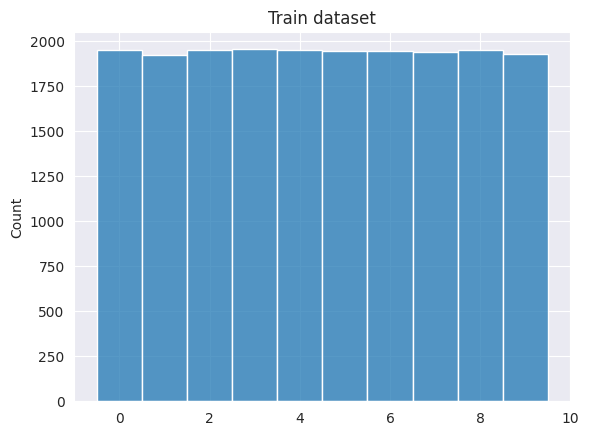

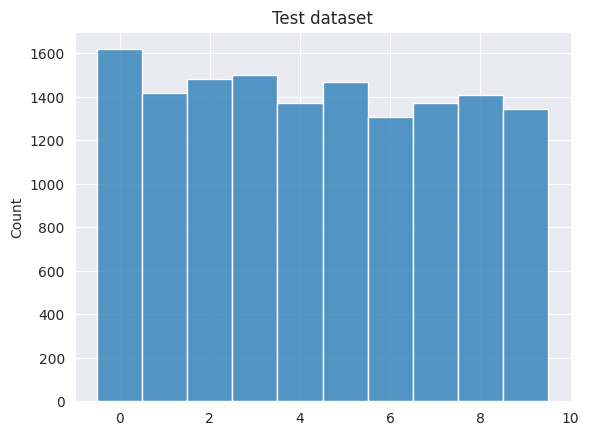

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Train dataset')
sns.histplot(train_dataset.labels, discrete=True)
plt.show()

plt.title('Test dataset')
sns.histplot(test_dataset.labels, discrete=True)
plt.show()

As we can see, both datasets are balanced.

In [5]:
img_sizes = []
for img, _ in train_dataset:
    img_sizes.append(img.size)

In [6]:
np.unique(img_sizes, return_counts=True, axis=0)

(array([[ 96, 103],
        [241, 298]]),
 array([19291,   122]))

In [7]:
img_sizes = []
for img, _ in test_dataset:
    img_sizes.append(img.size)

In [8]:
np.unique(img_sizes, return_counts=True, axis=0)

(array([[ 96, 103],
        [241, 298]]),
 array([14140,   132]))

Since some images have shape different from 103x96, resizing is required as a step of preprocessing.

In [193]:
IMG_SIZE = (103, 96)

In [271]:
from torchvision.transforms import Resize, ToTensor, Compose, Normalize

preprocess_transforms = Compose([
    Resize(IMG_SIZE),
    ToTensor(),
    Normalize((0.5,), (0.5,)),
])

In [273]:
import torch
import torch.nn as nn

In [274]:
class SmallCNN(nn.Module):
    """
    Source: https://medium.com/swlh/fingerprint-gender-classification-cnn-8b052a162a93
    Rewritten from keras and updated for 10 classes.
    """

    def __init__(self):
        super(SmallCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 12, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(12, 24, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(24 * 21 * 22, 120),
            nn.ReLU(),

            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 24 * 21 * 22)
        x = self.classifier(x)
        return x

In [275]:
train_dataset = FingerprintsDataset(data_dir='./task_2_data/train', transform=preprocess_transforms)
test_dataset = FingerprintsDataset(data_dir='./task_2_data/test', transform=preprocess_transforms)

In [276]:
from tqdm import tqdm
from time import time


def train(model, device, train_loader, criterion, optimizer, epoch):
    model.train()
    epoch_loss = 0
    start_time = time()
    correct = 0
    iteration = 0

    bar = tqdm(train_loader)
    for data, target in bar:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        iteration += 1
        bar.set_postfix({"Loss": format(epoch_loss / iteration, '.6f')})

    acc = 100. * correct / len(train_loader.dataset)
    print(f'\rTrain Epoch: {epoch}, elapsed time:{time() - start_time:.2f}s, {acc=}')
    return epoch_loss, acc


def test(model, device, test_loader, criterion, return_pred=False):
    model.eval()
    test_loss = 0
    correct = 0

    if return_pred:
        all_preds = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            if return_pred:
                all_preds.extend(pred.cpu().numpy().squeeze())
            correct += pred.eq(target.view_as(pred)).sum().item()

    acc = 100. * correct / len(test_loader.dataset)

    if return_pred:
        return test_loss, acc, all_preds

    return test_loss, acc

In [327]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

BATCH_SIZE = 512

all_indices = list(range(len(train_dataset)))
all_labels = list(train_dataset.labels)
train_ids, val_ids = train_test_split(all_indices, test_size=0.2, stratify=all_labels,
                                      random_state=SEED)

train_ds = Subset(train_dataset, train_ids)
val_ds = Subset(train_dataset, val_ids)

train_data_loader = DataLoader(train_ds, batch_size=BATCH_SIZE,
                               shuffle=True)
val_data_loader = DataLoader(val_ds, batch_size=BATCH_SIZE,
                             shuffle=False)

In [278]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [279]:
from copy import deepcopy
from torch import optim

NUM_EPOCHS = 30
clf = SmallCNN()
clf.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(clf.parameters(), lr=0.001)

best_model_wts = deepcopy(clf.state_dict())
best_acc = 0.0

In [280]:
torch.manual_seed(SEED)

In [281]:
for epoch in range(1, NUM_EPOCHS + 1):
    train_loss, train_acc = train(clf, device, train_data_loader, criterion, optimizer, epoch)

    test_loss, test_acc = test(clf, device, val_data_loader, criterion)
    print(f'{test_acc=}')
    if test_acc > best_acc:
        best_acc = test_acc
        best_model_wts = deepcopy(clf.state_dict())

100%|██████████| 31/31 [00:07<00:00,  4.27it/s, Loss=1.880128]


Train Epoch: 1, elapsed time:7.26s, acc=31.39085640695428
test_acc=43.368529487509655


100%|██████████| 31/31 [00:06<00:00,  4.45it/s, Loss=1.430657]


Train Epoch: 2, elapsed time:6.98s, acc=48.37733419188667
test_acc=52.279165593613186


100%|██████████| 31/31 [00:06<00:00,  4.49it/s, Loss=1.237450]


Train Epoch: 3, elapsed time:6.90s, acc=56.35544108177721
test_acc=56.83749678083956


100%|██████████| 31/31 [00:07<00:00,  4.42it/s, Loss=1.092930]


Train Epoch: 4, elapsed time:7.02s, acc=61.18480360592402
test_acc=59.49008498583569


100%|██████████| 31/31 [00:06<00:00,  4.48it/s, Loss=1.009185]


Train Epoch: 5, elapsed time:6.92s, acc=63.97939471989697
test_acc=63.68787020345094


100%|██████████| 31/31 [00:07<00:00,  4.42it/s, Loss=0.931620]


Train Epoch: 6, elapsed time:7.01s, acc=66.76754668383774
test_acc=62.657738861704864


100%|██████████| 31/31 [00:06<00:00,  4.45it/s, Loss=0.862714]


Train Epoch: 7, elapsed time:6.97s, acc=69.35608499678042
test_acc=64.12567602369302


100%|██████████| 31/31 [00:07<00:00,  4.42it/s, Loss=0.796996]


Train Epoch: 8, elapsed time:7.02s, acc=71.88023180940115
test_acc=68.47798094257018


100%|██████████| 31/31 [00:06<00:00,  4.50it/s, Loss=0.718176]


Train Epoch: 9, elapsed time:6.89s, acc=75.21571152607856
test_acc=69.50811228431625


100%|██████████| 31/31 [00:06<00:00,  4.48it/s, Loss=0.657957]


Train Epoch: 10, elapsed time:6.92s, acc=77.46297488731487
test_acc=72.59850630955447


100%|██████████| 31/31 [00:06<00:00,  4.48it/s, Loss=0.596429]


Train Epoch: 11, elapsed time:6.91s, acc=79.80038634900193
test_acc=71.95467422096317


100%|██████████| 31/31 [00:06<00:00,  4.52it/s, Loss=0.526666]


Train Epoch: 12, elapsed time:6.86s, acc=82.55634256278171
test_acc=75.92067988668555


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.454360]


Train Epoch: 13, elapsed time:6.93s, acc=85.35737282678686
test_acc=77.56889003347926


100%|██████████| 31/31 [00:06<00:00,  4.50it/s, Loss=0.400082]


Train Epoch: 14, elapsed time:6.89s, acc=87.61751448808758
test_acc=78.6762812258563


100%|██████████| 31/31 [00:06<00:00,  4.52it/s, Loss=0.342551]


Train Epoch: 15, elapsed time:6.86s, acc=89.60077269800387
test_acc=81.48338913211434


100%|██████████| 31/31 [00:06<00:00,  4.53it/s, Loss=0.270082]


Train Epoch: 16, elapsed time:6.85s, acc=92.49839021249196
test_acc=78.6762812258563


100%|██████████| 31/31 [00:06<00:00,  4.52it/s, Loss=0.263754]


Train Epoch: 17, elapsed time:6.87s, acc=92.07984546039923
test_acc=85.93870718516611


100%|██████████| 31/31 [00:06<00:00,  4.49it/s, Loss=0.204649]


Train Epoch: 18, elapsed time:6.91s, acc=94.57179652285899
test_acc=87.63842389904713


100%|██████████| 31/31 [00:06<00:00,  4.52it/s, Loss=0.145567]


Train Epoch: 19, elapsed time:6.87s, acc=96.69671603348358
test_acc=88.20499613700747


100%|██████████| 31/31 [00:06<00:00,  4.49it/s, Loss=0.128755]


Train Epoch: 20, elapsed time:6.90s, acc=96.88989053444945
test_acc=83.31187226371362


100%|██████████| 31/31 [00:06<00:00,  4.44it/s, Loss=0.107491]


Train Epoch: 21, elapsed time:6.99s, acc=97.7205408886027
test_acc=89.93046613443214


100%|██████████| 31/31 [00:07<00:00,  4.41it/s, Loss=0.079329]


Train Epoch: 22, elapsed time:7.04s, acc=98.59626529298133
test_acc=87.87020345094


100%|██████████| 31/31 [00:07<00:00,  4.37it/s, Loss=0.066003]


Train Epoch: 23, elapsed time:7.10s, acc=98.9375402446877
test_acc=91.24388359515838


100%|██████████| 31/31 [00:07<00:00,  4.25it/s, Loss=0.044652]


Train Epoch: 24, elapsed time:7.29s, acc=99.5556986477785
test_acc=90.88333762554726


100%|██████████| 31/31 [00:07<00:00,  4.33it/s, Loss=0.037409]


Train Epoch: 25, elapsed time:7.16s, acc=99.63940759819704
test_acc=92.86634045840844


100%|██████████| 31/31 [00:06<00:00,  4.44it/s, Loss=0.027007]


Train Epoch: 26, elapsed time:6.98s, acc=99.78750804893754
test_acc=92.91784702549575


100%|██████████| 31/31 [00:06<00:00,  4.51it/s, Loss=0.023011]


Train Epoch: 27, elapsed time:6.87s, acc=99.86477784932389
test_acc=92.96935359258305


100%|██████████| 31/31 [00:06<00:00,  4.50it/s, Loss=0.020528]


Train Epoch: 28, elapsed time:6.89s, acc=99.93560849967804
test_acc=93.30414627865053


100%|██████████| 31/31 [00:06<00:00,  4.48it/s, Loss=0.015794]


Train Epoch: 29, elapsed time:6.93s, acc=99.96780424983902
test_acc=93.09812001030132


100%|██████████| 31/31 [00:06<00:00,  4.52it/s, Loss=0.014257]


Train Epoch: 30, elapsed time:6.86s, acc=99.97424339987121
test_acc=93.45866597991244


In [282]:
torch.save(clf.state_dict(), "model.pt")
clf.load_state_dict(best_model_wts)
torch.save(clf.state_dict(), "best_model.pt")

Let us eval the best model on the test dataset

In [283]:
clf.load_state_dict(torch.load("best_model.pt"))

<All keys matched successfully>

In [284]:
test_data_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [285]:
%%time
_, score, preds = test(clf, device, test_data_loader, criterion, True)

CPU times: user 4.3 s, sys: 300 ms, total: 4.6 s
Wall time: 4.6 s


In [286]:
print(f'Accuracy: {score}')

Accuracy: 85.44702914798206


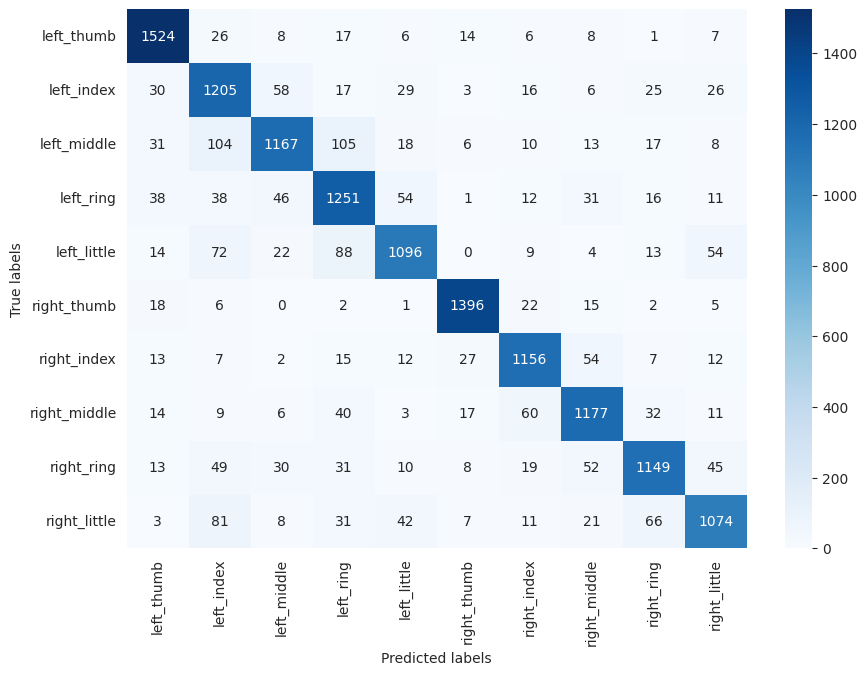

In [287]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# assuming you have ground truth and predicted labels in y_true and y_pred respectively
cm = confusion_matrix(test_dataset.labels, preds)

# convert the matrix to a pandas dataframe for convenience and set row/column names
cm_df = pd.DataFrame(cm, index=LABEL_NAMES, columns=LABEL_NAMES)

# plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sn.heatmap(cm_df, annot=True, cmap="Blues", fmt='.0f')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## Using augmentation

In [328]:
from torchvision import transforms

train_transform = Compose([
    transforms.RandomAffine(translate=(0.01, 0.01), scale=(0.9, 1.1), degrees=0),
    preprocess_transforms,
])

In [329]:
augmented_train_dataset = FingerprintsDataset(data_dir='./task_2_data/train',
                                              transform=train_transform)

aug_train_ds = Subset(augmented_train_dataset, train_ids)

aug_train_data_loader = DataLoader(aug_train_ds, batch_size=BATCH_SIZE,
                                   shuffle=True)

In [330]:
from copy import deepcopy
from torch import optim

NUM_EPOCHS = 30
clf = SmallCNN()
clf.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(clf.parameters(), lr=0.001)

best_model_wts = deepcopy(clf.state_dict())
best_acc = 0.0
for epoch in range(1, NUM_EPOCHS + 1):
    train_loss, train_acc = train(clf, device, aug_train_data_loader, criterion, optimizer, epoch)

    test_loss, test_acc = test(clf, device, val_data_loader, criterion)
    print(f'{test_acc=}')
    if test_acc > best_acc:
        best_acc = test_acc
        best_model_wts = deepcopy(clf.state_dict())

100%|██████████| 31/31 [00:07<00:00,  3.92it/s, Loss=1.932131]


Train Epoch: 1, elapsed time:7.91s, acc=30.03219575016098
test_acc=42.85346381663662


100%|██████████| 31/31 [00:07<00:00,  3.88it/s, Loss=1.437848]


Train Epoch: 2, elapsed time:8.00s, acc=48.6349001931745
test_acc=51.66108678856554


100%|██████████| 31/31 [00:07<00:00,  3.91it/s, Loss=1.254429]


Train Epoch: 3, elapsed time:7.93s, acc=54.92594977462975
test_acc=56.99201648210147


100%|██████████| 31/31 [00:07<00:00,  3.95it/s, Loss=1.146290]


Train Epoch: 4, elapsed time:7.85s, acc=58.81519639407598
test_acc=59.515838269379344


100%|██████████| 31/31 [00:07<00:00,  3.92it/s, Loss=1.101276]


Train Epoch: 5, elapsed time:7.91s, acc=60.1545396007727
test_acc=59.696111254184906


100%|██████████| 31/31 [00:07<00:00,  3.94it/s, Loss=1.025284]


Train Epoch: 6, elapsed time:7.87s, acc=63.00708306503542
test_acc=62.786505279423125


100%|██████████| 31/31 [00:07<00:00,  3.89it/s, Loss=0.980821]


Train Epoch: 7, elapsed time:7.97s, acc=64.52672247263361
test_acc=65.13005408189544


100%|██████████| 31/31 [00:07<00:00,  3.91it/s, Loss=0.936011]


Train Epoch: 8, elapsed time:7.93s, acc=66.27173213135866
test_acc=63.66211691990729


100%|██████████| 31/31 [00:07<00:00,  3.91it/s, Loss=0.882438]


Train Epoch: 9, elapsed time:7.94s, acc=68.28718609143593
test_acc=67.01004378058202


100%|██████████| 31/31 [00:07<00:00,  3.93it/s, Loss=0.835397]


Train Epoch: 10, elapsed time:7.90s, acc=70.09014810045075
test_acc=67.65387586917332


100%|██████████| 31/31 [00:07<00:00,  3.93it/s, Loss=0.779330]


Train Epoch: 11, elapsed time:7.90s, acc=72.07984546039923
test_acc=69.61112541849086


100%|██████████| 31/31 [00:07<00:00,  3.88it/s, Loss=0.745369]


Train Epoch: 12, elapsed time:7.99s, acc=72.81390856406955
test_acc=71.05330929693535


100%|██████████| 31/31 [00:07<00:00,  3.88it/s, Loss=0.708770]


Train Epoch: 13, elapsed time:8.00s, acc=74.72633612363168
test_acc=70.46098377543137


100%|██████████| 31/31 [00:08<00:00,  3.87it/s, Loss=0.688077]


Train Epoch: 14, elapsed time:8.01s, acc=75.2994204764971
test_acc=71.80015451970127


100%|██████████| 31/31 [00:07<00:00,  3.92it/s, Loss=0.644061]


Train Epoch: 15, elapsed time:7.91s, acc=76.84481648422408
test_acc=72.3667267576616


100%|██████████| 31/31 [00:07<00:00,  3.88it/s, Loss=0.602675]


Train Epoch: 16, elapsed time:7.99s, acc=79.14359304571796
test_acc=74.42698944115375


100%|██████████| 31/31 [00:07<00:00,  3.93it/s, Loss=0.572408]


Train Epoch: 17, elapsed time:7.89s, acc=79.8454603992273
test_acc=73.8604172031934


100%|██████████| 31/31 [00:07<00:00,  3.89it/s, Loss=0.546962]


Train Epoch: 18, elapsed time:7.97s, acc=80.97231165486156
test_acc=75.1995879474633


100%|██████████| 31/31 [00:08<00:00,  3.84it/s, Loss=0.528825]


Train Epoch: 19, elapsed time:8.08s, acc=81.54539600772698
test_acc=77.20834406386814


100%|██████████| 31/31 [00:08<00:00,  3.87it/s, Loss=0.484175]


Train Epoch: 20, elapsed time:8.01s, acc=83.50933676754669
test_acc=78.16121555498326


100%|██████████| 31/31 [00:07<00:00,  3.94it/s, Loss=0.441141]


Train Epoch: 21, elapsed time:7.87s, acc=84.95814552479072
test_acc=79.73216585114602


100%|██████████| 31/31 [00:07<00:00,  3.89it/s, Loss=0.423003]


Train Epoch: 22, elapsed time:7.97s, acc=85.37669027688345
test_acc=78.28998197270153


100%|██████████| 31/31 [00:08<00:00,  3.87it/s, Loss=0.402516]


Train Epoch: 23, elapsed time:8.02s, acc=85.97553122987766
test_acc=80.76229719289209


100%|██████████| 31/31 [00:08<00:00,  3.81it/s, Loss=0.372591]


Train Epoch: 24, elapsed time:8.13s, acc=87.01867353509337
test_acc=82.3590007725985


100%|██████████| 31/31 [00:07<00:00,  3.92it/s, Loss=0.342625]


Train Epoch: 25, elapsed time:7.91s, acc=88.20347714101739
test_acc=82.28174092196755


100%|██████████| 31/31 [00:07<00:00,  3.93it/s, Loss=0.319520]


Train Epoch: 26, elapsed time:7.89s, acc=89.30457179652286
test_acc=81.97270151944373


100%|██████████| 31/31 [00:07<00:00,  3.92it/s, Loss=0.309563]


Train Epoch: 27, elapsed time:7.90s, acc=89.6909207984546
test_acc=82.87406644347155


100%|██████████| 31/31 [00:07<00:00,  3.94it/s, Loss=0.315045]


Train Epoch: 28, elapsed time:7.87s, acc=89.25949774629748
test_acc=83.18310584599537


100%|██████████| 31/31 [00:07<00:00,  3.94it/s, Loss=0.281133]


Train Epoch: 29, elapsed time:7.87s, acc=90.4443013522215
test_acc=84.85706927633274


100%|██████████| 31/31 [00:07<00:00,  3.89it/s, Loss=0.266462]


Train Epoch: 30, elapsed time:7.98s, acc=90.76625885383129
test_acc=85.24336852948751


In [331]:
clf.load_state_dict(best_model_wts)

<All keys matched successfully>

In [332]:
%%time
_, score, preds = test(clf, device, test_data_loader, criterion, True)

CPU times: user 5.28 s, sys: 436 ms, total: 5.71 s
Wall time: 5.71 s


In [333]:
print(f'Accuracy: {score}')

Accuracy: 78.95179372197309


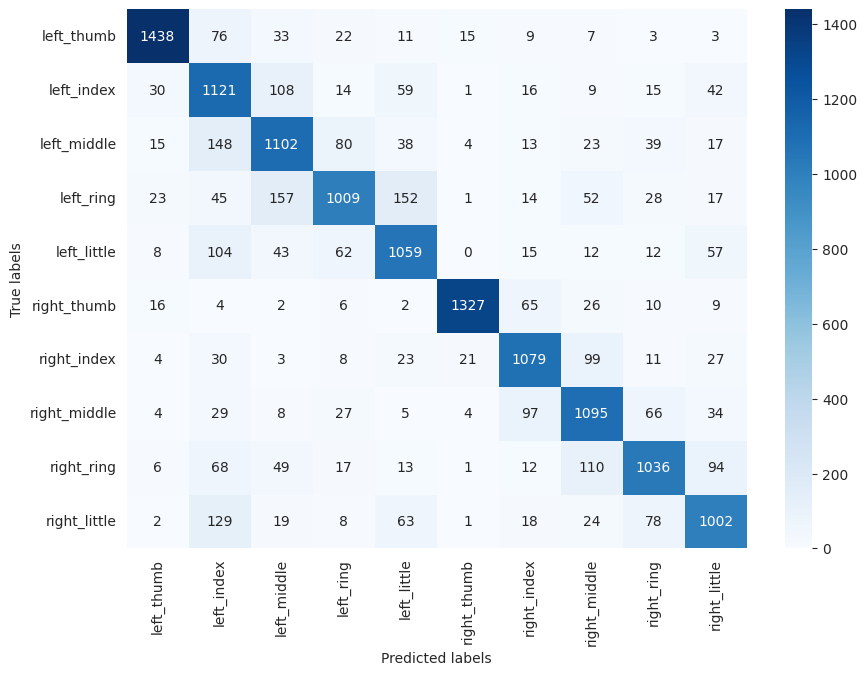

In [334]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# assuming you have ground truth and predicted labels in y_true and y_pred respectively
cm = confusion_matrix(test_dataset.labels, preds)

# convert the matrix to a pandas dataframe for convenience and set row/column names
cm_df = pd.DataFrame(cm, index=LABEL_NAMES, columns=LABEL_NAMES)

# plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sn.heatmap(cm_df, annot=True, cmap="Blues", fmt='.0f')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

As we can see

## Beyond data augmentation
### Batch normalization

In [365]:
class SmallCNNWithBatchNorm(SmallCNN):
    def __init__(self):
        super(SmallCNNWithBatchNorm, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 12, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(12),

            nn.Conv2d(12, 24, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(24)
        )
        self.classifier = nn.Sequential(
            nn.Linear(24 * 21 * 22, 120),
            nn.ReLU(),
            nn.BatchNorm1d(120),

            nn.Linear(120, 84),
            nn.ReLU(),
            nn.BatchNorm1d(84),
            nn.Linear(84, 10),
        )

In [366]:
NUM_EPOCHS = 30
clf = SmallCNNWithBatchNorm()
clf.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(clf.parameters(), lr=0.001)

best_model_wts = deepcopy(clf.state_dict())
best_acc = 0.0
for epoch in range(1, NUM_EPOCHS + 1):
    train_loss, train_acc = train(clf, device, train_data_loader, criterion, optimizer, epoch)

    test_loss, test_acc = test(clf, device, val_data_loader, criterion)
    print(f'{test_acc=}')
    if test_acc > best_acc:
        best_acc = test_acc
        best_model_wts = deepcopy(clf.state_dict())

100%|██████████| 31/31 [00:07<00:00,  4.42it/s, Loss=1.355630]


Train Epoch: 1, elapsed time:7.02s, acc=54.44945267224726
test_acc=51.48081380375998


100%|██████████| 31/31 [00:06<00:00,  4.45it/s, Loss=0.543309]


Train Epoch: 2, elapsed time:6.97s, acc=85.80167417900837
test_acc=87.61267061550348


100%|██████████| 31/31 [00:06<00:00,  4.44it/s, Loss=0.127565]


Train Epoch: 3, elapsed time:6.98s, acc=98.29362524146812
test_acc=95.1841359773371


100%|██████████| 31/31 [00:06<00:00,  4.43it/s, Loss=0.030040]


Train Epoch: 4, elapsed time:6.99s, acc=99.89697359948487
test_acc=96.54906000515065


100%|██████████| 31/31 [00:07<00:00,  4.41it/s, Loss=0.013565]


Train Epoch: 5, elapsed time:7.04s, acc=99.92273019961365
test_acc=96.70357970641257


100%|██████████| 31/31 [00:06<00:00,  4.44it/s, Loss=0.008941]


Train Epoch: 6, elapsed time:6.98s, acc=99.92916934964585
test_acc=96.65207313932527


100%|██████████| 31/31 [00:06<00:00,  4.46it/s, Loss=0.005674]


Train Epoch: 7, elapsed time:6.95s, acc=99.96136509980683
test_acc=96.85809940767447


100%|██████████| 31/31 [00:07<00:00,  4.41it/s, Loss=0.004796]


Train Epoch: 8, elapsed time:7.03s, acc=99.94204764971023
test_acc=96.96111254184909


100%|██████████| 31/31 [00:06<00:00,  4.45it/s, Loss=0.003371]


Train Epoch: 9, elapsed time:6.96s, acc=99.9935608499678
test_acc=96.93535925830544


100%|██████████| 31/31 [00:07<00:00,  4.39it/s, Loss=0.002978]


Train Epoch: 10, elapsed time:7.06s, acc=99.9935608499678
test_acc=96.88385269121812


100%|██████████| 31/31 [00:07<00:00,  4.27it/s, Loss=0.002290]


Train Epoch: 11, elapsed time:7.27s, acc=99.98712169993561
test_acc=97.01261910893639


100%|██████████| 31/31 [00:07<00:00,  4.34it/s, Loss=0.002110]


Train Epoch: 12, elapsed time:7.14s, acc=99.9935608499678
test_acc=96.85809940767447


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.001582]


Train Epoch: 13, elapsed time:6.94s, acc=100.0
test_acc=96.93535925830544


100%|██████████| 31/31 [00:06<00:00,  4.46it/s, Loss=0.001331]


Train Epoch: 14, elapsed time:6.96s, acc=100.0
test_acc=96.85809940767447


100%|██████████| 31/31 [00:07<00:00,  4.43it/s, Loss=0.001194]


Train Epoch: 15, elapsed time:7.00s, acc=100.0
test_acc=96.88385269121812


100%|██████████| 31/31 [00:07<00:00,  4.36it/s, Loss=0.001062]


Train Epoch: 16, elapsed time:7.12s, acc=100.0
test_acc=96.90960597476179


100%|██████████| 31/31 [00:06<00:00,  4.46it/s, Loss=0.000945]


Train Epoch: 17, elapsed time:6.95s, acc=100.0
test_acc=96.88385269121812


100%|██████████| 31/31 [00:07<00:00,  4.39it/s, Loss=0.000860]


Train Epoch: 18, elapsed time:7.07s, acc=100.0
test_acc=96.90960597476179


100%|██████████| 31/31 [00:07<00:00,  4.30it/s, Loss=0.000790]


Train Epoch: 19, elapsed time:7.21s, acc=100.0
test_acc=96.90960597476179


100%|██████████| 31/31 [00:07<00:00,  4.27it/s, Loss=0.000737]


Train Epoch: 20, elapsed time:7.27s, acc=100.0
test_acc=96.85809940767447


100%|██████████| 31/31 [00:07<00:00,  4.39it/s, Loss=0.000667]


Train Epoch: 21, elapsed time:7.06s, acc=100.0
test_acc=96.98686582539274


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.000614]


Train Epoch: 22, elapsed time:6.94s, acc=100.0
test_acc=96.93535925830544


100%|██████████| 31/31 [00:06<00:00,  4.43it/s, Loss=0.000575]


Train Epoch: 23, elapsed time:7.00s, acc=100.0
test_acc=96.93535925830544


100%|██████████| 31/31 [00:07<00:00,  4.33it/s, Loss=0.000524]


Train Epoch: 24, elapsed time:7.17s, acc=100.0
test_acc=96.93535925830544


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.000487]


Train Epoch: 25, elapsed time:6.94s, acc=100.0
test_acc=96.98686582539274


100%|██████████| 31/31 [00:07<00:00,  4.35it/s, Loss=0.000458]


Train Epoch: 26, elapsed time:7.13s, acc=100.0
test_acc=97.01261910893639


100%|██████████| 31/31 [00:07<00:00,  4.33it/s, Loss=0.000426]


Train Epoch: 27, elapsed time:7.16s, acc=100.0
test_acc=96.98686582539274


100%|██████████| 31/31 [00:07<00:00,  4.35it/s, Loss=0.000403]


Train Epoch: 28, elapsed time:7.13s, acc=100.0
test_acc=96.90960597476179


100%|██████████| 31/31 [00:07<00:00,  4.41it/s, Loss=0.000377]


Train Epoch: 29, elapsed time:7.04s, acc=100.0
test_acc=96.96111254184909


100%|██████████| 31/31 [00:07<00:00,  4.32it/s, Loss=0.000357]


Train Epoch: 30, elapsed time:7.17s, acc=100.0
test_acc=97.06412567602369


In [367]:
clf.load_state_dict(best_model_wts)

<All keys matched successfully>

In [368]:
%%time
_, score, preds = test(clf, device, test_data_loader, criterion, True)

CPU times: user 4.46 s, sys: 448 ms, total: 4.91 s
Wall time: 4.92 s


In [369]:
print(f'Accuracy: {score}')

Accuracy: 93.42068385650224


### Early stopping and LR scheduler

In [387]:
import operator


class EarlyStopping:
    def __init__(self, tolerance=5, min_delta=0, mode='min'):
        """
        :param tolerance: number of epochs that the metric doesn't improve
        :param min_delta: minimum improvement
        :param mode: 'min' or 'max' to minimize or maximize the metric
        """
        self.tolerance = tolerance
        self.min_delta = min_delta
        self.mode = mode
        self.counter = 0
        self.early_stop = False
        self.prev_metric = np.inf if mode == 'min' else -np.inf
        self.operation = operator.gt if mode == 'min' else operator.lt

    def __call__(self, metric) -> bool:
        """
        This function should return True if `metric` is not improving for
        'tolerance' calls
        """
        delta = (metric - self.prev_metric)

        if self.operation(delta, self.min_delta):
            self.counter += 1
        else:
            self.counter = 0
            self.prev_metric = metric

        if self.counter >= self.tolerance:
            self.early_stop = True
        return self.early_stop

In [388]:
from torch.optim import lr_scheduler

NUM_EPOCHS = 50
clf = SmallCNNWithBatchNorm()
clf.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(clf.parameters(), lr=0.001)

scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'max', factor=0.5,
                                           patience=2, verbose=True, min_lr=1e-5)
early_stopping = EarlyStopping(tolerance=10, mode='max')

best_model_wts = deepcopy(clf.state_dict())
best_acc = 0.0
for epoch in range(1, NUM_EPOCHS + 1):
    train_loss, train_acc = train(clf, device, train_data_loader, criterion, optimizer, epoch)

    test_loss, test_acc = test(clf, device, val_data_loader, criterion)
    scheduler.step(test_acc)
    print(f'{test_acc=}')

    if early_stopping(test_acc):
        print('\nEarly stopping\n')
        break

    if test_acc > best_acc:
        best_acc = test_acc
        best_model_wts = deepcopy(clf.state_dict())

100%|██████████| 31/31 [00:06<00:00,  4.44it/s, Loss=1.387689]


Train Epoch: 1, elapsed time:6.99s, acc=53.0328396651642
test_acc=49.987123358228175


100%|██████████| 31/31 [00:06<00:00,  4.45it/s, Loss=0.603307]


Train Epoch: 2, elapsed time:6.97s, acc=84.01159047005795
test_acc=86.17048673705898


100%|██████████| 31/31 [00:07<00:00,  4.37it/s, Loss=0.146799]


Train Epoch: 3, elapsed time:7.10s, acc=98.0103026400515
test_acc=92.01648210146794


100%|██████████| 31/31 [00:06<00:00,  4.44it/s, Loss=0.035920]


Train Epoch: 4, elapsed time:6.98s, acc=99.81970379909852
test_acc=96.54906000515065


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.013650]


Train Epoch: 5, elapsed time:6.94s, acc=99.94848679974244
test_acc=97.01261910893639


100%|██████████| 31/31 [00:07<00:00,  4.39it/s, Loss=0.009328]


Train Epoch: 6, elapsed time:7.07s, acc=99.93560849967804
test_acc=96.78083955704352


100%|██████████| 31/31 [00:06<00:00,  4.43it/s, Loss=0.008475]


Train Epoch: 7, elapsed time:6.99s, acc=99.91629104958146
test_acc=96.93535925830544


100%|██████████| 31/31 [00:06<00:00,  4.49it/s, Loss=0.005576]


Train Epoch: 8, elapsed time:6.91s, acc=99.96136509980683
Epoch 00008: reducing learning rate of group 0 to 5.0000e-04.
test_acc=96.93535925830544


100%|██████████| 31/31 [00:07<00:00,  4.40it/s, Loss=0.003873]


Train Epoch: 9, elapsed time:7.04s, acc=99.98712169993561
test_acc=96.93535925830544


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.003123]


Train Epoch: 10, elapsed time:6.94s, acc=100.0
test_acc=96.93535925830544


100%|██████████| 31/31 [00:06<00:00,  4.48it/s, Loss=0.002845]


Train Epoch: 11, elapsed time:6.93s, acc=100.0
test_acc=97.03837239248004


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.002520]


Train Epoch: 12, elapsed time:6.93s, acc=100.0
test_acc=96.96111254184909


100%|██████████| 31/31 [00:06<00:00,  4.48it/s, Loss=0.002262]


Train Epoch: 13, elapsed time:6.93s, acc=100.0
test_acc=97.06412567602369


100%|██████████| 31/31 [00:07<00:00,  4.32it/s, Loss=0.002096]


Train Epoch: 14, elapsed time:7.18s, acc=100.0
test_acc=96.98686582539274


100%|██████████| 31/31 [00:06<00:00,  4.46it/s, Loss=0.001885]


Train Epoch: 15, elapsed time:6.96s, acc=100.0
test_acc=97.01261910893639


100%|██████████| 31/31 [00:06<00:00,  4.49it/s, Loss=0.001763]


Train Epoch: 16, elapsed time:6.91s, acc=100.0
Epoch 00016: reducing learning rate of group 0 to 2.5000e-04.
test_acc=97.01261910893639


100%|██████████| 31/31 [00:06<00:00,  4.50it/s, Loss=0.001643]


Train Epoch: 17, elapsed time:6.89s, acc=100.0
test_acc=97.03837239248004


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.001579]


Train Epoch: 18, elapsed time:6.94s, acc=100.0
test_acc=97.06412567602369


100%|██████████| 31/31 [00:06<00:00,  4.46it/s, Loss=0.001524]


Train Epoch: 19, elapsed time:6.95s, acc=100.0
Epoch 00019: reducing learning rate of group 0 to 1.2500e-04.
test_acc=97.03837239248004


100%|██████████| 31/31 [00:06<00:00,  4.48it/s, Loss=0.001486]


Train Epoch: 20, elapsed time:6.92s, acc=100.0
test_acc=97.03837239248004


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.001454]


Train Epoch: 21, elapsed time:6.93s, acc=100.0
test_acc=97.03837239248004


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.001422]


Train Epoch: 22, elapsed time:6.94s, acc=100.0
Epoch 00022: reducing learning rate of group 0 to 6.2500e-05.
test_acc=97.03837239248004


100%|██████████| 31/31 [00:06<00:00,  4.45it/s, Loss=0.001401]


Train Epoch: 23, elapsed time:6.97s, acc=100.0
test_acc=97.03837239248004


100%|██████████| 31/31 [00:06<00:00,  4.48it/s, Loss=0.001390]


Train Epoch: 24, elapsed time:6.92s, acc=100.0
test_acc=97.03837239248004


100%|██████████| 31/31 [00:06<00:00,  4.46it/s, Loss=0.001352]


Train Epoch: 25, elapsed time:6.95s, acc=100.0
Epoch 00025: reducing learning rate of group 0 to 3.1250e-05.
test_acc=97.03837239248004


100%|██████████| 31/31 [00:06<00:00,  4.45it/s, Loss=0.001335]


Train Epoch: 26, elapsed time:6.97s, acc=100.0
test_acc=96.98686582539274


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.001327]


Train Epoch: 27, elapsed time:6.94s, acc=100.0
test_acc=97.03837239248004


100%|██████████| 31/31 [00:06<00:00,  4.47it/s, Loss=0.001322]


Train Epoch: 28, elapsed time:6.94s, acc=100.0
Epoch 00028: reducing learning rate of group 0 to 1.5625e-05.
test_acc=97.03837239248004

Early stopping



In [389]:
clf.load_state_dict(best_model_wts)

<All keys matched successfully>

In [390]:
%%time
_, score, preds = test(clf, device, test_data_loader, criterion, True)

CPU times: user 4.27 s, sys: 356 ms, total: 4.62 s
Wall time: 4.63 s


In [391]:
print(f'Accuracy: {score}')

Accuracy: 93.7359865470852


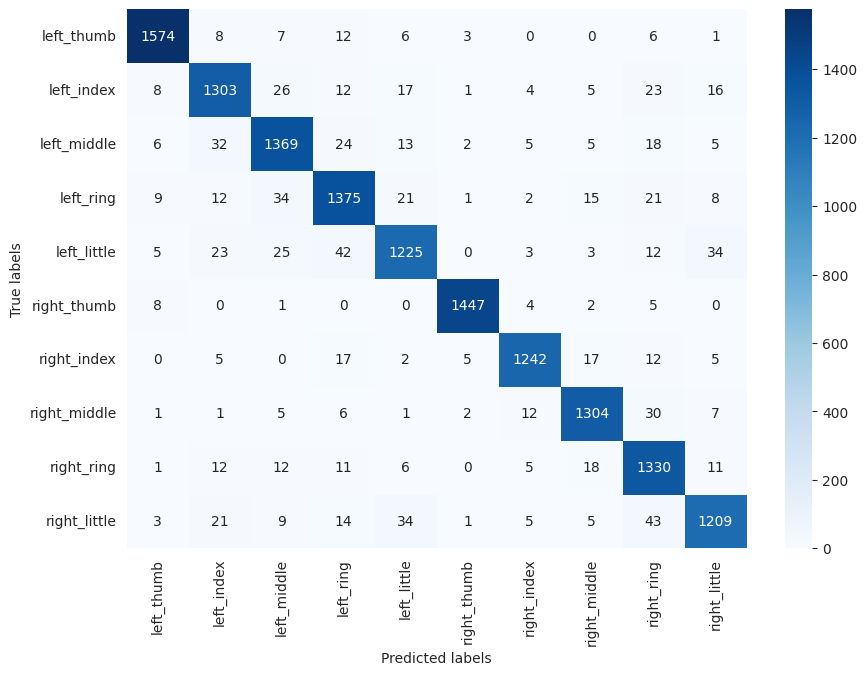

In [392]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# assuming you have ground truth and predicted labels in y_true and y_pred respectively
cm = confusion_matrix(test_dataset.labels, preds)

# convert the matrix to a pandas dataframe for convenience and set row/column names
cm_df = pd.DataFrame(cm, index=LABEL_NAMES, columns=LABEL_NAMES)

# plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sn.heatmap(cm_df, annot=True, cmap="Blues", fmt='.0f')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Questions
1. What preprocessing techniques did you use? Why?
    - I resized all images to the same size and normalized them for better convergence.
2. What data augmentation techniques did you use?
    - None, because they made the model perform worse. I tried many transforms with different parameters but all of them resulted in worse performance.
3. Describe the fine-tuning process and how you reached your final CNN model.
    - I have added batch normalization to the original architecture, which resulted in better convergence (fewer epochs required) and improved accuracy. I also tried adding dropout, but it did not make too much of a difference performance-wise.
4. What techniques did you use to improve model’s performance other than data augmentation
    - Batch normalization (resulted in the most improvement), LR scheduler and early stopping (slightly improved score by preventing overfit).

# Task 3: Credit approval (15 points)

Credit approval is necessary to assess an individual's creditworthiness and determine their eligibility for loans, credit cards, and other financial products. It helps lenders to evaluate the borrower's ability to repay the loan, their credit history, and other financial obligations.
Credit approval is important for both lenders and borrowers because it enables lenders to manage their risk and make informed lending decisions while ensuring that borrowers can obtain financing on fair and reasonable terms.

In many credit approval applications, it is crucial for the model to be interpretable. This means that the model's inner workings and decision-making process can be easily understood and explained by humans. An interpretable model can help to build trust in the model's output, provide transparency in the decision-making process, and enable regulators to monitor and audit the model's performance. 

## What you need to do

For the `loan_data.csv` data, predict if the bank should give a loan or not.

- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Learning Objectives

- Apply DTs, and RFs to solve a classification problem (basic training, validation, testing. 50%
- Fine-tune to determine the optimal model architecture. 20%
- Evaluate and compare the performance of different models. 10%
- Visualise the models. 20%


### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv('loan_data.csv')
train_df.head()

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [54]:
train_df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

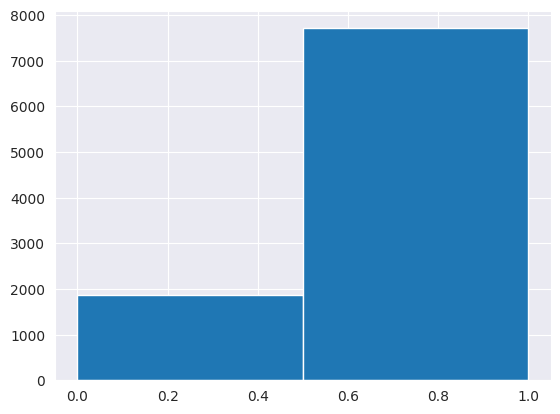

In [55]:
train_df['credit.policy'].hist(bins=2)
plt.show()

In [56]:
from sklearn.preprocessing import OrdinalEncoder

purpose_encoder = OrdinalEncoder()
purpose_encoder.fit(train_df.purpose.to_numpy().reshape(-1, 1))

OrdinalEncoder()

In [57]:
X = train_df.drop(columns=['credit.policy'])
X.purpose = purpose_encoder.transform(X.purpose.to_numpy().reshape(-1, 1))
y = train_df['credit.policy']
X.head()

,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,2.0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1.0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2.0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,2.0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1.0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED,
                                                    stratify=y)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_clf = DecisionTreeClassifier(random_state=SEED)

dt_clf.fit(X_train, y_train)

print(classification_report(y_test, dt_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9758    0.9706    0.9732       374
           1     0.9929    0.9942    0.9935      1542

    accuracy                         0.9896      1916
   macro avg     0.9843    0.9824    0.9834      1916
weighted avg     0.9895    0.9896    0.9896      1916



In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=SEED)

rf_clf.fit(X_train, y_train)

print(classification_report(y_test, rf_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9834    0.9519    0.9674       374
           1     0.9884    0.9961    0.9922      1542

    accuracy                         0.9875      1916
   macro avg     0.9859    0.9740    0.9798      1916
weighted avg     0.9874    0.9875    0.9874      1916



## Trying again but with balanced dataset

In [61]:
from sklearn.utils import resample

credit_policy_filter = y_train == 1

# separate majority and minority classes
X_train_majority = X_train[credit_policy_filter]
X_train_minority = X_train[~credit_policy_filter]

y_train_majority = y_train[credit_policy_filter]
y_train_minority = y_train[~credit_policy_filter]

# Upsample minority class
X_train_minority_upsampled = resample(
    X_train_minority,
    replace=True,
    n_samples=len(X_train_majority),
    random_state=SEED
)

y_train_minority_upsampled = resample(
    y_train_minority,
    replace=True,
    n_samples=len(y_train_majority),
    random_state=SEED
)

# Combine majority class with upsampled minority class
X_train_balanced = pd.concat([X_train_majority, X_train_minority_upsampled])
y_train_balanced = pd.concat([y_train_majority, y_train_minority_upsampled])

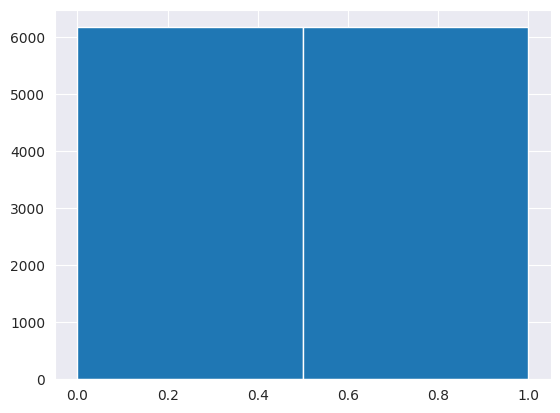

In [87]:
y_train_balanced.hist(bins=2)
plt.show()

In [63]:
dt_clf = DecisionTreeClassifier(random_state=SEED)
dt_clf.fit(X_train_balanced, y_train_balanced)

print(classification_report(y_test, dt_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9809    0.9626    0.9717       374
           1     0.9910    0.9955    0.9932      1542

    accuracy                         0.9890      1916
   macro avg     0.9859    0.9790    0.9824      1916
weighted avg     0.9890    0.9890    0.9890      1916



In [64]:
rf_clf = RandomForestClassifier(random_state=SEED)
rf_clf.fit(X_train_balanced, y_train_balanced)

print(classification_report(y_test, rf_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9863    0.9626    0.9743       374
           1     0.9910    0.9968    0.9939      1542

    accuracy                         0.9901      1916
   macro avg     0.9886    0.9797    0.9841      1916
weighted avg     0.9901    0.9901    0.9900      1916



As we can see, resampling did not make too much of a difference with default classifier parameters (but slightly improved RF performance). Let us use grid search to fine tune DT and RF and compare their performance.

In [83]:
from sklearn.model_selection import GridSearchCV
import numpy as np

dt_clf = DecisionTreeClassifier(random_state=SEED)

# Define parameter grids
dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": np.arange(2, 11, dtype=np.int8),
    "min_samples_leaf": np.arange(1, 11, dtype=np.int8),
    "max_features": ["sqrt", "log2", X_train.shape[1], 0.5, 0.75, 0.9]
}

# Define grid search objects
dt_grid = GridSearchCV(dt_clf, param_grid=dt_param_grid, cv=5, scoring="f1_macro", n_jobs=6,
                       verbose=1)

In [84]:
dt_grid.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', 13, 0.5, 0.75, 0.9],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8)},
             scoring='f1_macro', verbose=1)

In [85]:
dt_grid.best_score_, dt_grid.best_params_

(0.9961899028287993,
 {'criterion': 'entropy',
  'max_features': 13,
  'min_samples_leaf': 1,
  'min_samples_split': 4})

In [86]:
print(classification_report(y_test, dt_grid.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9811    0.9706    0.9758       374
           1     0.9929    0.9955    0.9942      1542

    accuracy                         0.9906      1916
   macro avg     0.9870    0.9830    0.9850      1916
weighted avg     0.9906    0.9906    0.9906      1916



In [89]:
rf_clf = RandomForestClassifier(random_state=SEED, **dt_grid.best_params_)
rf_param_grid = {"n_estimators": [10, 50, 100, 200, 500]}
rf_grid = GridSearchCV(rf_clf, param_grid=rf_param_grid, cv=5, scoring="f1_macro", n_jobs=6,
                       verbose=1)

In [91]:
rf_grid.fit(X_train_balanced, y_train_balanced)
rf_grid.best_score_, rf_grid.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


(0.9972438644040766, {'n_estimators': 50})

In [92]:
print(classification_report(y_test, rf_grid.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9838    0.9759    0.9799       374
           1     0.9942    0.9961    0.9951      1542

    accuracy                         0.9922      1916
   macro avg     0.9890    0.9860    0.9875      1916
weighted avg     0.9922    0.9922    0.9922      1916



In [114]:
import graphviz
from sklearn import tree


def plot_tree(clf):
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=X.columns,
                                    class_names=["Do not meets the policy", "Meets the policy"],
                                    filled=True, rounded=True,
                                    special_characters=True)
    return graphviz.Source(dot_data)

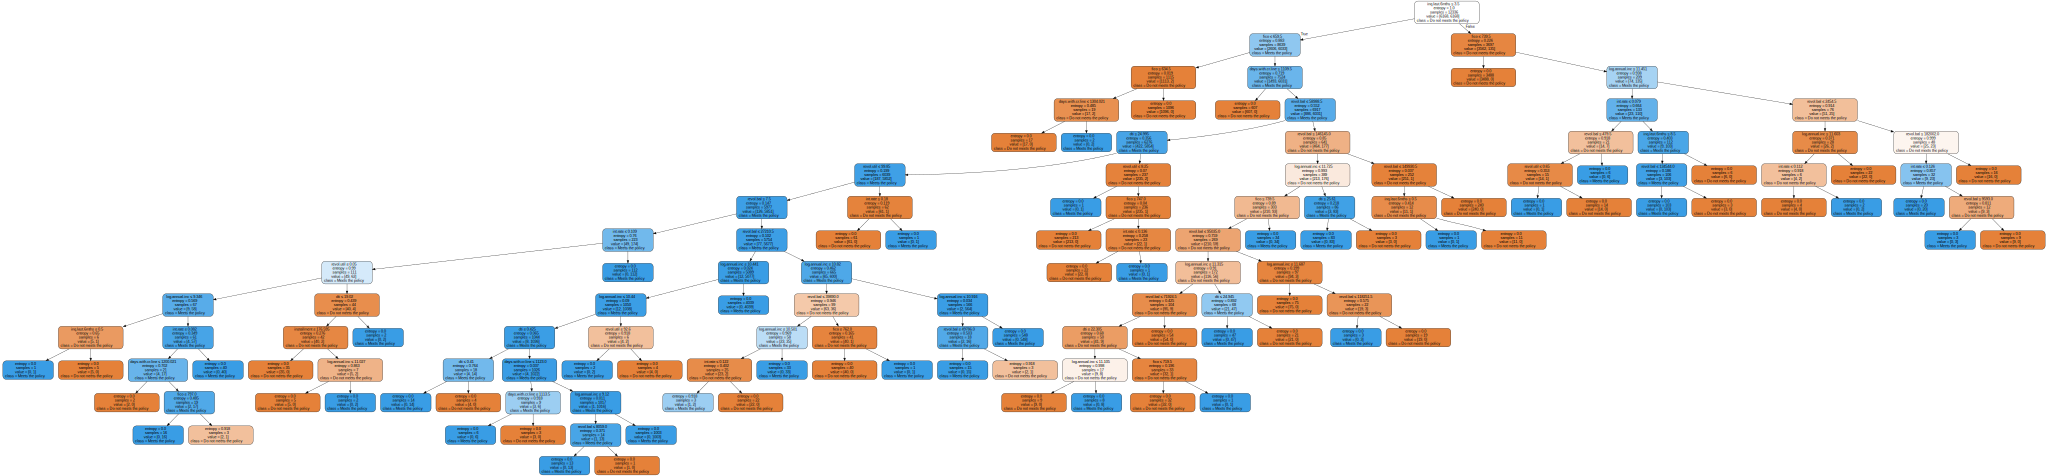

In [122]:
dt_plot = plot_tree(dt_grid.best_estimator_)
dt_plot

In [117]:
dt_plot.render("dt_output", format="png")

'output.png'

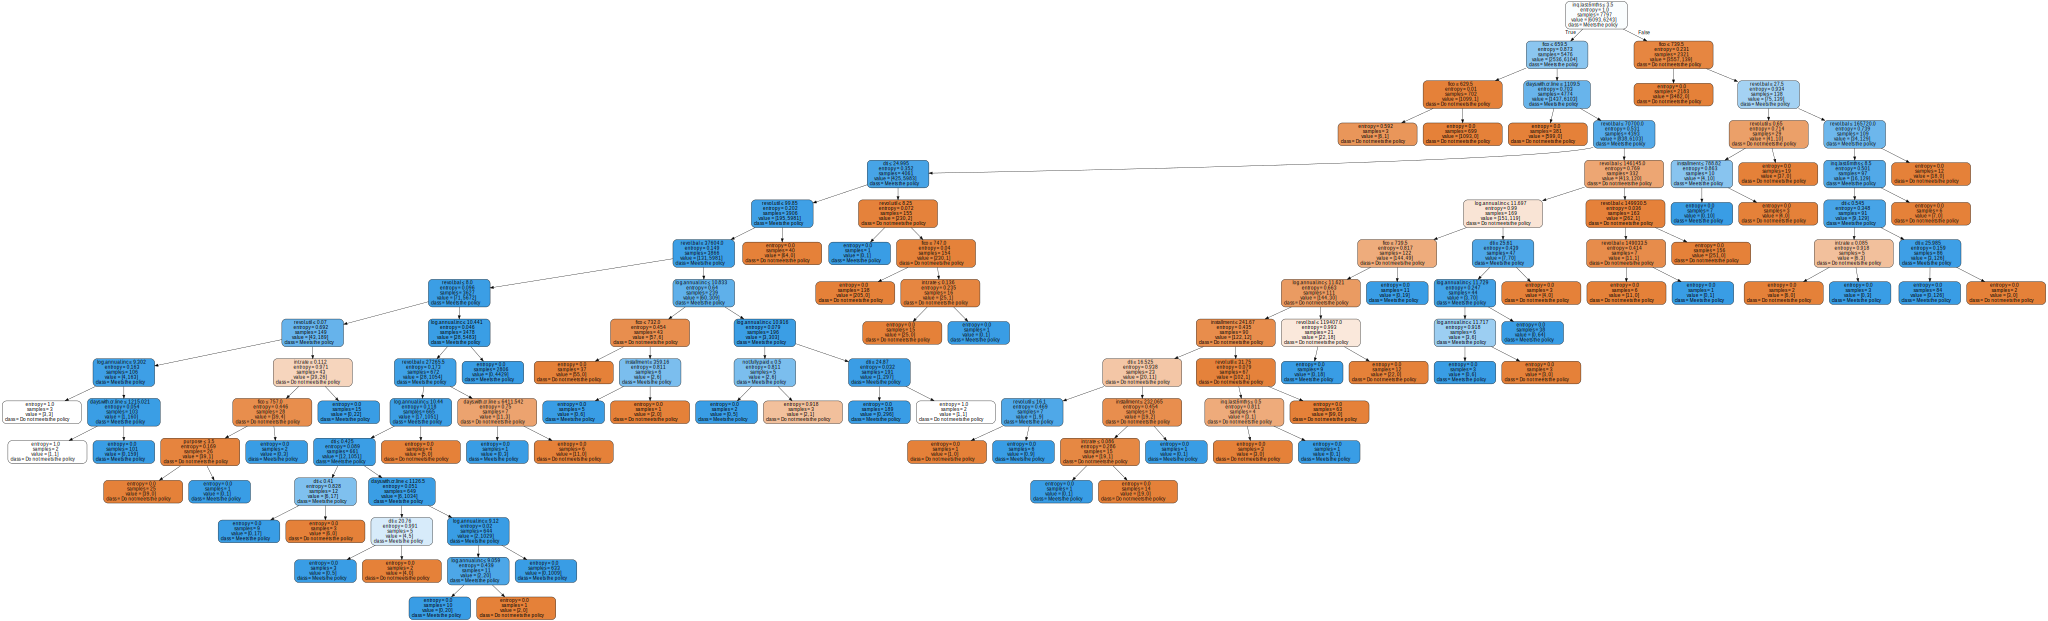

In [120]:
rf_plot = plot_tree(rf_grid.best_estimator_.estimators_[0])
rf_plot

In [121]:
rf_plot.render("rf_output", format="png")

'rf_output.png'

## Compare depths of DT and RF

### DT depth

In [125]:
dt_grid.best_estimator_.get_depth()

14

### RF max depth

In [126]:
max(rf_tree.get_depth() for rf_tree in rf_grid.best_estimator_.estimators_)

17

### Questions
1. How did the DT compare to the RF in performance? Why?
    - Random Forest shows slightly better performance than Decision Tree as it had a higher macro F1 score on resampled dataset both before and after grid search. This could be attributed to Random Forest's use of ensemble learning, which combines multiple Decision Trees to improve accuracy and reduce overfitting, while Decision Tree is a standalone algorithm that can be prone to overfitting, especially with a large number of features or instances. After grid search, both classifiers improved in performance, but Random Forest still had a higher score due to its overall stronger algorithmic approach.
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
    - Since RF classifier uses an ensemble of multiple trees, it allows these trees to reach a greater maximum depth without leading to overfitting, as it can happen with DT classifier.
3. What is ensemble learning? What are its pros and cons?
    - Ensemble learning is a technique of combining multiple models.
    - Pros: better performance compared to single model, less prone to overfitting.
    - Cons: requires more time and memory, less interpretable.
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
    - Two types of boosting methods are AdaBoost and Gradient Boosting. AdaBoost (Adaptive Boosting) combines weak learners into a strong learner by emphasizing the misclassified data points. Gradient Boosting builds a strong model by sequentially adding weak learners to the previous models based on their errors. Two types of bagging methods are Random Forest and Bagged Decision Trees. Random Forest is a type of bagging that uses an ensemble model based on decision trees to reduce overfitting and increase accuracy. Bagged Decision Trees aggregate multiple decision trees, each trained on a different random subset of the training data.